<a href="https://colab.research.google.com/github/Raboooiii/Sem6/blob/main/LabCycle_Q7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gymnasium matplotlib numpy

In [2]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

class MazeEnv(gym.Env):
    def __init__(self):
        super(MazeEnv, self).__init__()

        self.maze = np.array([
            [0, 0, 0, 1, 0],
            [1, 1, 0, 1, 0],
            [0, 0, 0, 0, 0],
            [0, 1, 1, 1, 0],
            [0, 0, 0, 1, 0]
        ])

        self.start = (0, 0)
        self.goal = (4, 4)

        self.state = self.start

        # Actions: 0=Up, 1=Down, 2=Left, 3=Right
        self.action_space = spaces.Discrete(4)

        # Observation space (position in grid)
        self.observation_space = spaces.Tuple((
            spaces.Discrete(5),
            spaces.Discrete(5)
        ))

    def reset(self, seed=None, options=None):
        self.state = self.start
        return self.state, {}

    def step(self, action):
        x, y = self.state

        if action == 0:  # Up
            x -= 1
        elif action == 1:  # Down
            x += 1
        elif action == 2:  # Left
            y -= 1
        elif action == 3:  # Right
            y += 1

        # Check boundaries and walls
        if (0 <= x < 5 and 0 <= y < 5 and self.maze[x, y] == 0):
            self.state = (x, y)

        reward = -1
        done = False

        if self.state == self.goal:
            reward = 100
            done = True

        return self.state, reward, done, False, {}

    def render(self):
        maze_display = self.maze.copy()
        x, y = self.state
        maze_display[x, y] = 8  # Agent

        clear_output(wait=True)
        plt.imshow(maze_display)
        plt.title("Maze")
        plt.axis("off")
        plt.show()
        time.sleep(0.3)

In [3]:
env = MazeEnv()

# Initialize Q-table
q_table = {}

for x in range(5):
    for y in range(5):
        q_table[(x, y)] = np.zeros(4)

In [4]:
alpha = 0.1       # Learning rate
gamma = 0.9       # Discount factor
epsilon = 1.0     # Exploration rate
epsilon_decay = 0.995
min_epsilon = 0.01
episodes = 1000

In [5]:
rewards = []

for episode in range(episodes):
    state, _ = env.reset()
    total_reward = 0
    done = False

    while not done:
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        next_state, reward, done, _, _ = env.step(action)

        # Q-learning update
        old_value = q_table[state][action]
        next_max = np.max(q_table[next_state])

        q_table[state][action] = old_value + alpha * (
            reward + gamma * next_max - old_value
        )

        state = next_state
        total_reward += reward

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards.append(total_reward)

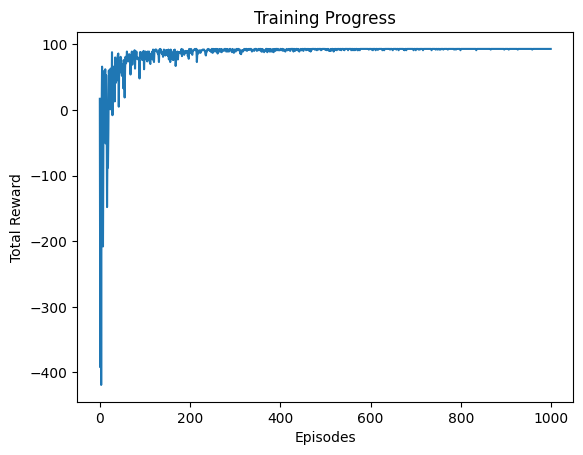

In [6]:
plt.plot(rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Training Progress")
plt.show()

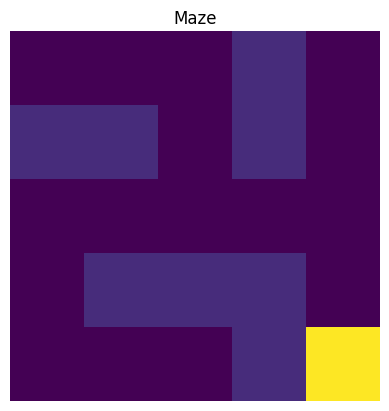

Reached Goal!
Success Rate: 1.0


In [7]:
state, _ = env.reset()
done = False

while not done:
    env.render()
    action = np.argmax(q_table[state])
    state, _, done, _, _ = env.step(action)

env.render()
print("Reached Goal!")

success = 0
test_episodes = 100

for _ in range(test_episodes):
    state, _ = env.reset()
    done = False

    while not done:
        action = np.argmax(q_table[state])
        state, _, done, _, _ = env.step(action)

    if state == env.goal:
        success += 1

print("Success Rate:", success / test_episodes)